### $\text{Homework - I}$

$\text{Problem 4: Implementation of multi-step methods}$

In [1]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy.linalg as npla
import scipy.linalg as spla

In [2]:
h1 = 0.1
h2 = 0.05

In [3]:
def f(t,y):
    '''(a)'''
    val = np.power(t,2) - np.power(y,2)
    val *= np.sin(y)
    return val

In [4]:
def g(t,y):
    '''(b)'''
    val = 2*t + np.exp(-t*y)
    return val

In [5]:
def k(t,y):
    '''(c)'''
    val = (np.power(y,2) + 2*t*y)
    val /= (3 + np.power(t,2))
    return val

In [6]:
def compute_runge_kutta(x,y,h,func):
    k1 = func(x[-1],y[-1])
    k2 = func(x[-1] + (h/2), y[-1] + (h/2)*k1)
    k3 = func(x[-1] + (h/2), y[-1] + (h/2)*k2)
    k4 = func(x[-1] + h, y[-1] + h*k3)
    y_ = y[-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return y_

In [7]:
def adam_bashforth(to, tn, yo, h, func):
    
    t = to
    x = [to]
    y = [yo]
    
    '''compute initial terms using Runge-Kutta method'''
    for i in range(3):
        t += h
        y.append(compute_runge_kutta(x,y,h,func))
        x.append(t)    
    
    while t <= tn:
        
        y_ = y[-1]
        f = func(x[-1],y[-1])
        f1 = func(x[-2],y[-2])
        f2 = func(x[-3],y[-3])
        f3 = func(x[-4],y[-4])
        y_ += (h/24)*(55*f-59*f1+37*f2-9*f3)
        y.append(y_)
        
        t += h
        x.append(t)
    
    return x,y  

In [8]:
def adam_moulton(to, tn, yo, h, func):
    
    t = to
    x = [to]
    y = [yo]
    
    '''compute initial terms using Runge-Kutta method'''
    for i in range(3):
        t += h
        y.append(compute_runge_kutta(x,y,h,func))
        x.append(t)   
    
    while t <= tn:
        
        y_ = y[-1]
        f = func(x[-1],y[-1])
        f1 = func(x[-2],y[-2])
        f2 = func(x[-3],y[-3])
        
        y_old = y_ + (h/24)*(28*f-5*f1+f2) 
        t += h
        
        for i in range(100000):
            
            y_curr = y_ + (h/24)*(9*func(t,y_old)+19*f-5*f1+f2)
            
            if np.absolute(y_curr - y_old) < np.power(10.0,-5):
                x.append(t)
                y.append(y_curr)
                break
            else:
                y_old = y_curr
        
        t += h
    
    return x,y  

In [9]:
def predictor(x,y,h,func):
    
    y_ = y[-1]
    f = func(x[-1],y[-1])
    f1 = func(x[-2],y[-2])
    f2 = func(x[-3],y[-3])
    f3 = func(x[-4],y[-4])
    y_ += (h/24)*(55*f-59*f1+37*f2-9*f3)
    
    return y_

def corrector(x,y,h,yn,func):
    
    y_ = y[-1]
    f = func(x[-1]+h,yn)
    f1 = func(x[-1],y[-1])
    f2 = func(x[-2],y[-2])
    f3 = func(x[-3],y[-3])
    y_ += (h/24)*(9*f+19*f1-5*f2+f3)
    
    return y_ 

def predictor_corrector(to, tn, yo, h, func):
    
    t = to
    x = [to]
    y = [yo]
    
    '''compute initial terms using Runge-Kutta method'''
    for i in range(3):
        y.append(compute_runge_kutta(x,y,h,func))
        t += h
        x.append(t)    
    
    while t <= tn:
        
        y_predicted = predictor(x,y,h,func)
        y_corrected = corrector(x,y,h,y_predicted,func)
        x.append(t)
        y.append(y_corrected)
        
        t += h
    
    return x,y

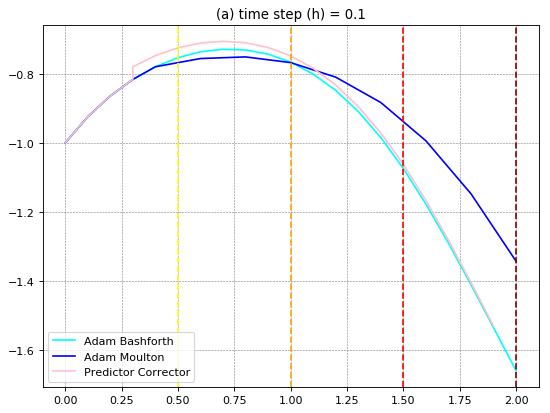

In [10]:
to = 0
tn = 2

x_ab, y_ab = adam_bashforth(to,tn,-1,h1,f)
x_am, y_am = adam_moulton(to,tn,-1,h1,f)
x_pc, y_pc = predictor_corrector(to,tn,-1,h1,f)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('(a) time step (h) = 0.1')
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.plot(x_ab,y_ab,color='cyan',label='Adam Bashforth')
plt.plot(x_am,y_am,color='blue',label='Adam Moulton')
plt.plot(x_pc,y_pc,color='pink',label='Predictor Corrector')
plt.legend(loc='best')
plt.axvline(0.5, label = "0.5",color='yellow',linestyle='dashed')
plt.axvline(1.0, label = "1.0",color='orange',linestyle='dashed')
plt.axvline(1.5, label = "1.5",color='red',linestyle='dashed')
plt.axvline(2.0, label = "2.0",color='maroon',linestyle='dashed')
plt.show()

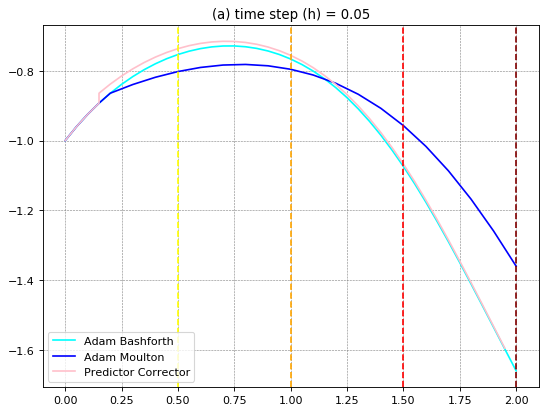

In [11]:
to = 0
tn = 2

x_ab, y_ab = adam_bashforth(to,tn,-1,h2,f)
x_am, y_am = adam_moulton(to,tn,-1,h2,f)
x_pc, y_pc = predictor_corrector(to,tn,-1,h2,f)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('(a) time step (h) = 0.05')
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.plot(x_ab,y_ab,color='cyan',label='Adam Bashforth')
plt.plot(x_am,y_am,color='blue',label='Adam Moulton')
plt.plot(x_pc,y_pc,color='pink',label='Predictor Corrector')
plt.legend(loc='best')
plt.axvline(0.5, label = "0.5",color='yellow',linestyle='dashed')
plt.axvline(1.0, label = "1.0",color='orange',linestyle='dashed')
plt.axvline(1.5, label = "1.5",color='red',linestyle='dashed')
plt.axvline(2.0, label = "2.0",color='maroon',linestyle='dashed')
plt.show()

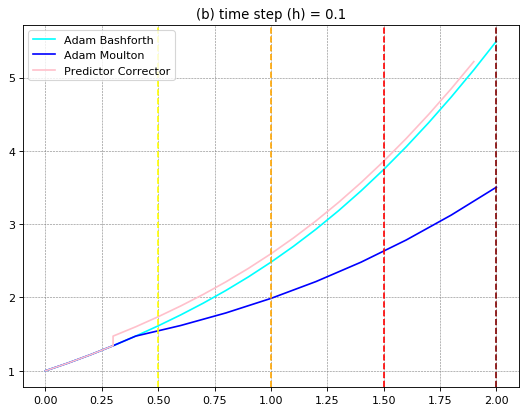

In [12]:
to = 0
tn = 2

x_ab, y_ab = adam_bashforth(to,tn,1,h1,g)
x_am, y_am = adam_moulton(to,tn,1,h1,g)
x_pc, y_pc = predictor_corrector(to,tn,1,h1,g)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('(b) time step (h) = 0.1')
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.plot(x_ab,y_ab,color='cyan',label='Adam Bashforth')
plt.plot(x_am,y_am,color='blue',label='Adam Moulton')
plt.plot(x_pc,y_pc,color='pink',label='Predictor Corrector')
plt.legend(loc='best')
plt.axvline(0.5, label = "0.5",color='yellow',linestyle='dashed')
plt.axvline(1.0, label = "1.0",color='orange',linestyle='dashed')
plt.axvline(1.5, label = "1.5",color='red',linestyle='dashed')
plt.axvline(2.0, label = "2.0",color='maroon',linestyle='dashed')
plt.show()

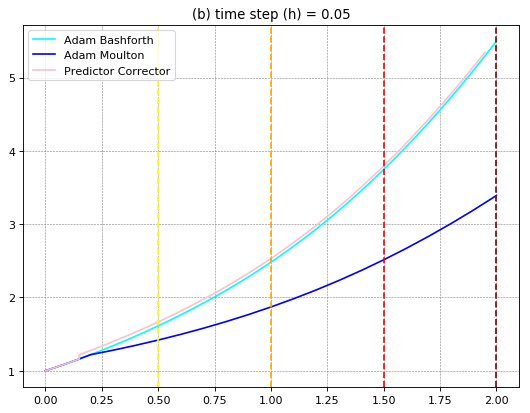

In [13]:
to = 0
tn = 2

x_ab, y_ab = adam_bashforth(to,tn,1,h2,g)
x_am, y_am = adam_moulton(to,tn,1,h2,g)
x_pc, y_pc = predictor_corrector(to,tn,1,h2,g)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('(b) time step (h) = 0.05')
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.plot(x_ab,y_ab,color='cyan',label='Adam Bashforth')
plt.plot(x_am,y_am,color='blue',label='Adam Moulton')
plt.plot(x_pc,y_pc,color='pink',label='Predictor Corrector')
plt.legend(loc='best')
plt.axvline(0.5, label = "0.5",color='yellow',linestyle='dashed')
plt.axvline(1.0, label = "1.0",color='orange',linestyle='dashed')
plt.axvline(1.5, label = "1.5",color='red',linestyle='dashed')
plt.axvline(2.0, label = "2.0",color='maroon',linestyle='dashed')
plt.show()

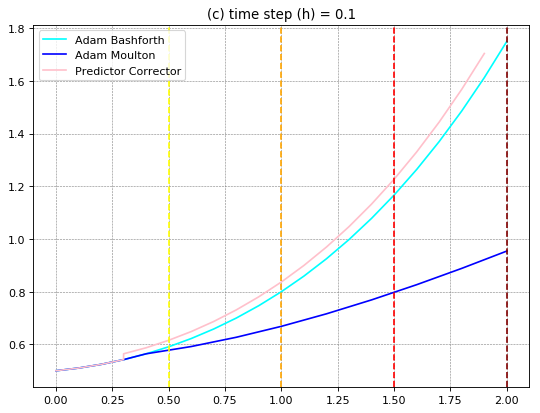

In [14]:
to = 0
tn = 2

x_ab, y_ab = adam_bashforth(to,tn,0.5,h1,k)
x_am, y_am = adam_moulton(to,tn,0.5,h1,k)
x_pc, y_pc = predictor_corrector(to,tn,0.5,h1,k)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('(c) time step (h) = 0.1')
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.plot(x_ab,y_ab,color='cyan',label='Adam Bashforth')
plt.plot(x_am,y_am,color='blue',label='Adam Moulton')
plt.plot(x_pc,y_pc,color='pink',label='Predictor Corrector')
plt.legend(loc='best')
plt.axvline(0.5, label = "0.5",color='yellow',linestyle='dashed')
plt.axvline(1.0, label = "1.0",color='orange',linestyle='dashed')
plt.axvline(1.5, label = "1.5",color='red',linestyle='dashed')
plt.axvline(2.0, label = "2.0",color='maroon',linestyle='dashed')
plt.show()

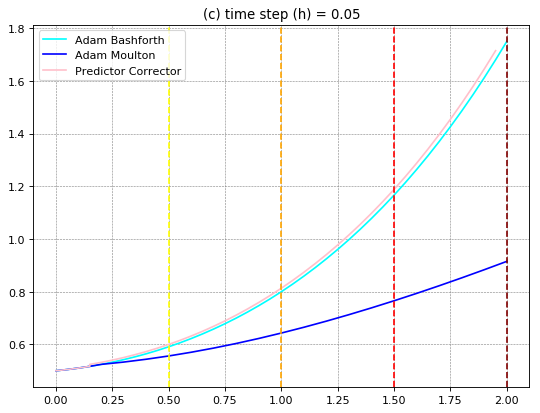

In [15]:
to = 0
tn = 2

x_ab, y_ab = adam_bashforth(to,tn,0.5,h2,k)
x_am, y_am = adam_moulton(to,tn,0.5,h2,k)
x_pc, y_pc = predictor_corrector(to,tn,0.5,h2,k)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('(c) time step (h) = 0.05')
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.plot(x_ab,y_ab,color='cyan',label='Adam Bashforth')
plt.plot(x_am,y_am,color='blue',label='Adam Moulton')
plt.plot(x_pc,y_pc,color='pink',label='Predictor Corrector')
plt.legend(loc='best')
plt.axvline(0.5, label = "0.5",color='yellow',linestyle='dashed')
plt.axvline(1.0, label = "1.0",color='orange',linestyle='dashed')
plt.axvline(1.5, label = "1.5",color='red',linestyle='dashed')
plt.axvline(2.0, label = "2.0",color='maroon',linestyle='dashed')
plt.show()

#### $\text{Ashwin Singh}$
<br/>

#### $\text{2017222}$